**Link** **Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [6]:
  DATASET_PATH ="/content/drive/My Drive//ICD10/sample data.csv"

**import packages**

In [2]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

In [4]:
from keras.preprocessing.sequence import pad_sequences

In [7]:
df = pd.read_csv(DATASET_PATH)

In [8]:
df.head()

,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae"
0,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
1,A009,"Cholera, unspecified"
2,A0100,"Typhoid fever, unspecified"
3,A0101,Typhoid meningitis
4,A0102,Typhoid fever with heart involvement


In [9]:
#give columns names
df.columns =['Code', 'Desc']


In [10]:
df.head()

,Code,Desc
0,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
1,A009,"Cholera, unspecified"
2,A0100,"Typhoid fever, unspecified"
3,A0101,Typhoid meningitis
4,A0102,Typhoid fever with heart involvement


In [11]:
df.Code.value_counts()


A052     10
A1783    10
A1789    10
A0222    10
A0681    10
         ..
A155     10
A060     10
A088     10
A0102    10
A000      9
Name: Code, Length: 100, dtype: int64

In [12]:
df = df.reset_index(drop=True)
stopwords = nltk.corpus.stopwords.words('english')
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
from nltk.corpus import stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [15]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Desc'] = df['Desc'].apply(clean_text)
df['Desc'] = df['Desc'].str.replace('\d+', '')

In [16]:
df.head()

,Code,Desc
0,A001,cholera due vibrio cholerae biovar eltor
1,A009,cholera unspecified
2,A0100,typhoid fever unspecified
3,A0101,typhoid meningitis
4,A0102,typhoid fever heart involvement


In [17]:
from nltk.tokenize import sent_tokenize,word_tokenize
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100 
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Desc'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 125 unique tokens.


In [18]:
X = tokenizer.texts_to_sequences(df['Desc'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (999, 250)


In [19]:
Y = pd.get_dummies(df['Code']).values

In [20]:
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (999, 100)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(899, 250) (899, 100)
(100, 250) (100, 100)


In [22]:
from keras import Sequential
from keras.layers import SpatialDropout1D

In [23]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/20
13/13 [==============================] - 13s 743ms/step - loss: 4.6006 - accuracy: 0.0198 - val_loss: 4.5973 - val_accuracy: 0.0222
Epoch 2/20
13/13 [==============================] - 9s 698ms/step - loss: 4.5749 - accuracy: 0.1075 - val_loss: 4.5882 - val_accuracy: 0.0333
Epoch 3/20
13/13 [==============================] - 9s 700ms/step - loss: 4.5436 - accuracy: 0.1384 - val_loss: 4.6058 - val_accuracy: 0.0222
Epoch 4/20
13/13 [==============================] - 9s 704ms/step - loss: 4.4877 - accuracy: 0.1248 - val_loss: 4.5457 - val_accuracy: 0.1000
Epoch 5/20
13/13 [==============================] - 9s 708ms/step - loss: 4.3872 - accuracy: 0.1656 - val_loss: 4.4834 - val_accuracy: 0.1000
Epoch 6/20
13/13 [==============================] - 9s 703ms/step - loss: 4.1646 - accuracy: 0.1854 - val_loss: 4.2853 - val_accuracy: 0.0333
Epoch 7/20
13/13 [==============================] - 9s 699ms/step - loss: 3.7885 - accuracy: 0.2892 - val_loss: 3.9323 - val_accuracy: 0.2000
Epoch

In [24]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 0s 58ms/step - loss: 0.3865 - accuracy: 1.0000
Test set
  Loss: 0.386
  Accuracy: 1.000


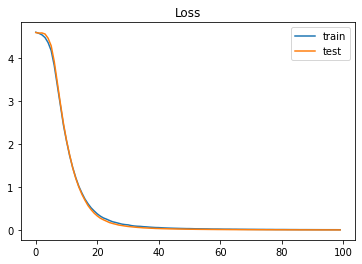

In [69]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [77]:
new_complaint = ['tuberculosis kidney']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
a = np.argmax(pred)
#print(a)
a = a-1
print(df['Code'][a])
print(df['Desc'][a])
#print(np.argmax(pred))


A1811
tuberculosis kidney ureter


In [66]:
df.head(100)

,Code,Desc
0,A001,cholera due vibrio cholerae biovar eltor
1,A009,cholera unspecified
2,A0100,typhoid fever unspecified
3,A0101,typhoid meningitis
4,A0102,typhoid fever heart involvement
...,...,...
95,A1809,musculoskeletal tuberculosis
96,A1810,tuberculosis genitourinary system unspecified
97,A1811,tuberculosis kidney ureter
98,A1812,tuberculosis bladder


In [38]:
a

-1

In [119]:
pred = np.sort(model.predict(padded), axis=0)


In [52]:
pred

array([[3.03488894e-04, 3.05496760e-05, 6.72448473e-03, 1.14049332e-03,
        1.80396549e-02, 2.00151917e-04, 1.82145119e-01, 9.23719909e-03,
        1.81447752e-02, 1.13881961e-03, 6.19034236e-03, 1.42686605e-03,
        1.19806721e-03, 1.57371932e-03, 1.95452180e-02, 3.87424300e-03,
        1.96384368e-04, 9.43932962e-03, 2.02588439e-01, 5.68948919e-03,
        2.92839855e-02, 4.06454410e-03, 7.13932910e-04, 7.02986435e-04,
        7.98262947e-04, 3.55199067e-04, 4.51816944e-04, 2.32292037e-03,
        8.01712449e-04, 7.98477307e-02, 1.07938349e-02, 2.29494017e-05,
        1.64632074e-05, 7.19445889e-05, 1.35078517e-04, 2.89244599e-05,
        6.87607238e-03, 2.58847926e-04, 1.10505724e-04, 2.18901841e-05,
        4.20497381e-05, 1.94018594e-05, 2.82685761e-03, 2.84487638e-03,
        1.20775054e-04, 1.14948874e-04, 9.87078674e-05, 2.69135373e-04,
        1.97552567e-04, 7.84354706e-05, 7.07242987e-04, 1.29638589e-04,
        3.32965021e-04, 1.80184329e-03, 1.68784652e-04, 1.238317

In [59]:
i = pred[0][:].tolist()

In [63]:
print(i.sort())

None


In [129]:
df.head()

,Code,Desc
0,A001,cholera due vibrio cholerae biovar eltor
1,A009,cholera unspecified
2,A0100,typhoid fever unspecified
3,A0101,typhoid meningitis
4,A0102,typhoid fever heart involvement
